## About Notebook

In this notebook, our goal is to train a machine learning model for the detection of Panic Disorder, using the Panic Disorder Detection dataset and the Gradient Boosting classifier methodology.

Panic Disorder is a serious mental health condition that affects millions of people worldwide. It's a debilitating condition that can lead to the development of phobias and anxiety, making everyday activities extremely challenging for those suffering from this condition. In this regard, early and accurate detection is a critical step towards effective treatment and management of this disease.

Gradient Boosting is a powerful machine learning algorithm that builds a prediction model in an incremental manner, allowing the optimization of arbitrary loss functions. At each step, the model is enhanced by adding an estimator that reduces the prediction error. The flexibility and effectiveness of this algorithm make it suitable for our problem at hand.



## Libraries

In [1]:
import os

import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
panic_disorder_detection_dataset_path = "/kaggle/input/panic-disorder-detection-dataset"
training_dataset_path = os.path.join(panic_disorder_detection_dataset_path, "panic_disorder_dataset_training.csv")
testing_dataset_path = os.path.join(panic_disorder_detection_dataset_path, "panic_disorder_dataset_testing.csv")

print(training_dataset_path)
print(testing_dataset_path)

/kaggle/input/panic-disorder-detection-dataset/panic_disorder_dataset_training.csv
/kaggle/input/panic-disorder-detection-dataset/panic_disorder_dataset_testing.csv


In [3]:
training_df = pd.read_csv(training_dataset_path)
testing_df = pd.read_csv(testing_dataset_path)

print("Training size", training_df.shape)
print("Testing size", testing_df.shape)

Training size (100000, 17)
Testing size (20000, 17)


In [4]:
# Create a copy of the training DataFrame
df = training_df.copy()
df.head()

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,38,Male,No,Yes,Moderate,Shortness of breath,Mild,Mild,Rural,Diabetes,Bipolar disorder,NaN,Socializing,High,Sleep quality,0
1,2,51,Male,No,No,High,Panic attacks,Mild,Mild,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Sleep quality,0
2,3,32,Female,Yes,No,High,Panic attacks,Mild,Significant,Urban,Diabetes,Depressive disorder,NaN,Seeking therapy,Moderate,Exercise,0
3,4,64,Female,No,No,Moderate,Chest pain,Moderate,Moderate,Rural,Diabetes,NaN,NaN,Meditation,High,Exercise,0
4,5,31,Male,Yes,No,Moderate,Panic attacks,Mild,Moderate,Rural,Asthma,NaN,Drugs,Seeking therapy,Low,Sleep quality,0


## Data Understanding

**DataFrame Columns Description**
* Participant ID: A unique identifier for each participant in the survey or study. Typically, this is a number that has no intrinsic meaning other than identifying a unique individual.

* Age: The age of the participant at the time of the survey or study.

* Gender: The gender of the participant.

* Family History: Information about the presence of Panic Disorder or other mental health disorders in the participant's family.

* Personal History: The personal history of the participant, likely referring to past events or conditions relevant to mental health.

* Current Stressors: Current stressors in the participant's life that might affect mental health.

* Symptoms: The symptoms reported by the participant

* Severity: The severity of the symptoms reported by the participant.

* Impact on Life: Measures the degree to which the symptoms affect the participant's daily life, whether at work, in relationships, or other areas.

* Demographics: Demographic information about the participant.

* Medical History: The general medical history of the participant.

* Psychiatric History: The psychiatric history of the participant.

* Substance Use: Information about the participant's use of substances.

* Coping Mechanisms: The coping strategies the participant uses to deal with stress or the symptoms of Panic Disorder.

* Social Support: The amount and quality of social support available to the participant, such as friends, family, or support groups.

* Lifestyle Factors: Factors related to the participant's lifestyle that might affect mental health, such as sleep patterns, diet, and physical exercise.

* Panic Disorder Diagnosis: The diagnosis of Panic Disorder, likely indicating whether the participant has been diagnosed with the disorder or not.

**Data Dictionary**

In [5]:
# Create a DataFrame that includes only the 'object' columns
object_df = df.select_dtypes(include=['object'])

# Create a DataFrame to store the information
data_dict = pd.DataFrame(object_df.dtypes, columns=['Type'])

# Add a column for a sample of unique values in each column
data_dict['Unique Values Sample'] = object_df.apply(lambda x: x.unique())

data_dict

,Type,Unique Values Sample
Gender,object,"[Male, Female]"
Family History,object,"[No, Yes]"
Personal History,object,"[Yes, No]"
Current Stressors,object,"[Moderate, High, Low]"
Symptoms,object,"[Shortness of breath, Panic attacks, Chest pai..."
Severity,object,"[Mild, Moderate, Severe]"
Impact on Life,object,"[Mild, Significant, Moderate]"
Demographics,object,"[Rural, Urban]"
Medical History,object,"[Diabetes, Asthma, nan, Heart disease]"
Psychiatric History,object,"[Bipolar disorder, Anxiety disorder, Depressiv..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Participant ID            100000 non-null  int64 
 1   Age                       100000 non-null  int64 
 2   Gender                    100000 non-null  object
 3   Family History            100000 non-null  object
 4   Personal History          100000 non-null  object
 5   Current Stressors         100000 non-null  object
 6   Symptoms                  100000 non-null  object
 7   Severity                  100000 non-null  object
 8   Impact on Life            100000 non-null  object
 9   Demographics              100000 non-null  object
 10  Medical History           74827 non-null   object
 11  Psychiatric History       75079 non-null   object
 12  Substance Use             66626 non-null   object
 13  Coping Mechanisms         100000 non-null  object
 14  Socia

**There are no missing values**

In [7]:
df.drop(columns="Participant ID", inplace=True)
testing_df.drop(columns="Participant ID", inplace=True)

## EDA

## Univariate Analysis

### Age

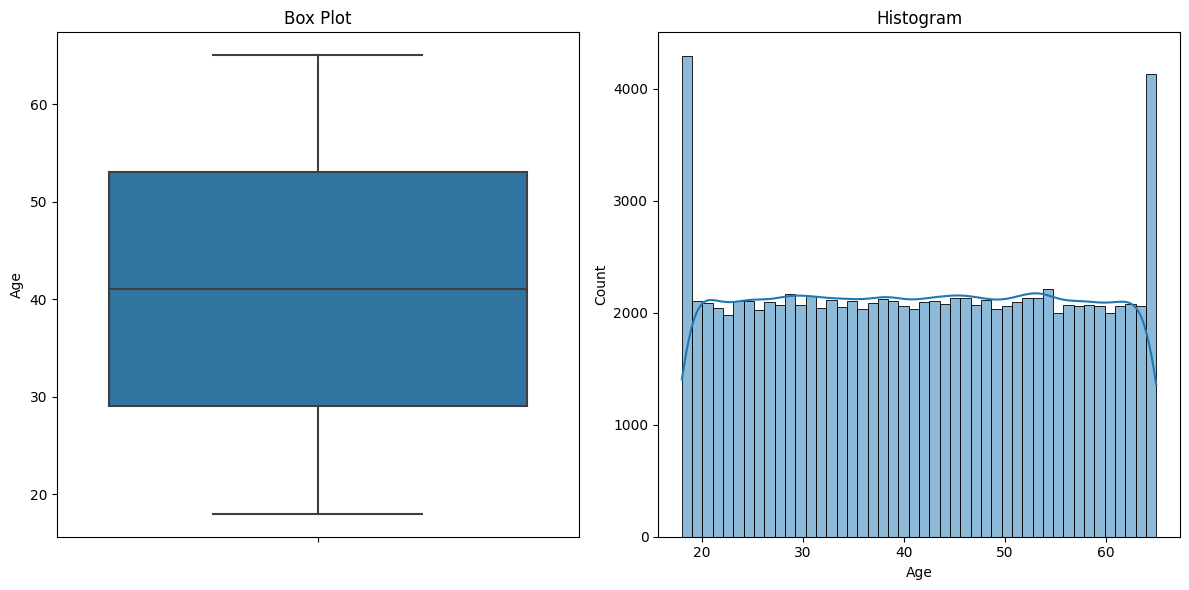

count    100000.000000
mean         41.454300
std          13.839204
min          18.000000
25%          29.000000
50%          41.000000
75%          53.000000
max          65.000000
Name: Age, dtype: float64

In [8]:
column="Age"

# Box Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df[column])
plt.title('Box Plot')

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(data=df, x=column, kde=True)
plt.title('Histogram')

plt.tight_layout()
plt.show()

df[column].describe()

Let's analyze...

This age distribution portrays an example of a distribution generated from an algorithm. It presents a very specific pattern in the distribution of data, which is quite unlikely to occur in real life.

Real data tend to be "noisy" and not normally distributed.

### Gender

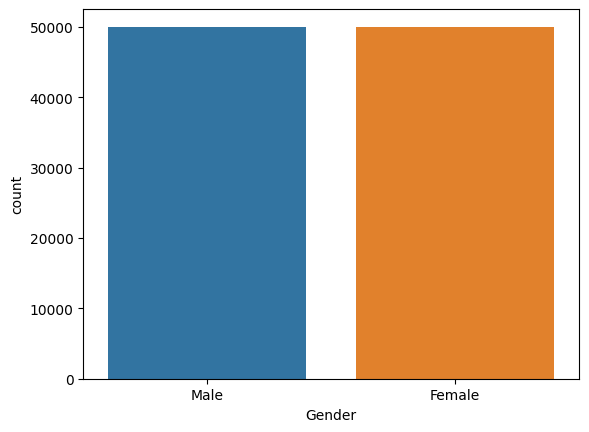

Gender
Male      50052
Female    49948
Name: count, dtype: int64

In [9]:
sns.countplot(data=df, x="Gender")
plt.show()

df["Gender"].value_counts()

Another example that validates our hypothesis that this DataFrame was generated by an algorithm. The distribution between genders is perfect.

That's okay, our intent is to learn with the Gradient Boosting classifier algorithm.

NOTE: It makes sense to carry out exploratory analysis to learn how to manipulate the DataFrame, understand data visualization concepts, storytelling, among others. However, we should refrain from drawing definitive conclusions, as there is strong evidence that the DataFrame was generated by an algorithm.

Additionally, exploratory analysis on this synthesized dataset can be an advantageous exercise. This provides us with the opportunity to understand and prepare for real-world scenarios. It allows us to practice techniques for cleaning data, handling missing or unusual values, and even discovering potential biases or errors in the data generation process.

Furthermore, by examining the data distribution and relationships between features, we become better equipped to select suitable algorithms for our models, engineer relevant features, and validate our models' performances.

Lastly, while storytelling with this data, it is important to acknowledge the data's origin. Synthetic data, such as this, helps us develop and refine our data handling and analysis skills without exposing sensitive real-world information. Although our insights might not translate directly into real-world applications, the skills and intuition gained from this analysis are invaluable.

Feel free to contribute to this notebook in the EDA (Exploratory Data Analysis) section. Whether it's finding new insights, proposing different data visualization techniques, suggesting effective ways of handling the data, or simply sharing your thoughts and ideas, your collaboration can enhance our collective understanding of this synthesized dataset. By sharing our diverse perspectives and experiences, we all stand to learn and grow.



## Pre Processing Data

### Concepts

#### About Train, Validation and Test

In machine learning, it is common to split the dataset into three subsets: training, validation, and test. This is crucial for creating robust models and preventing overfitting.

Training Data: The training dataset is the largest portion of the entire dataset and is used to train the model. It forms the basis for our machine learning algorithms to learn from the patterns and relationships in the data. The model sees and learns from this data.

Validation Data: The validation dataset provides an unbiased evaluation of the model fit on the training data while tuning the model's hyperparameters. It's used to prevent overfitting, which happens when a model learns the training data too well, picking up noise and outlier patterns. Overfit models perform well on the training data but poorly on unseen data, which is a problem considering our end goal is to make predictions on new, unseen data.

Test Data: The test dataset provides the final unbiased estimate of the model's performance. It is only used once after the model has been finalized. It's crucial not to use the test data in the model building process to avoid "data leakage", which would give an overly optimistic estimate of the model's performance.

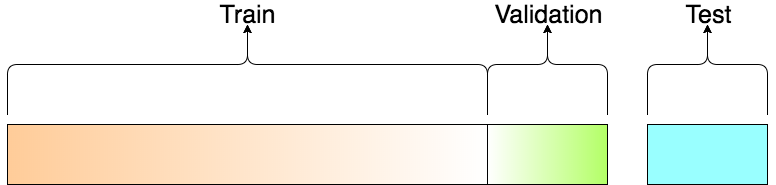

In our case, we have an entire test dataset with 20,000 instances, and a training dataset contains 100,000 instances. Therefore, we will split them as follows:

Training Data: 70,000 instances - This is the majority of our data and it will be used to train our model. We will expose this data to our algorithm to learn and create a fit for the data's patterns and relationships.

Validation Data: 30,000 instances - This portion of the data will serve to provide an unbiased evaluation of our model fit during the training phase. It will allow us to tune our model's hyperparameters and assist in preventing overfitting.

Test Data: 20,000 instances - This set will provide the final evaluation of our model. After all training and validation has been done, we will use this unseen data to get an unbiased estimate of how our model might expect to perform in a real-world scenario.

Reference: http://tarangshah.com/blog/2017-12-03/train-validation-and-test-sets/

In [10]:
target = "Panic Disorder Diagnosis"

X = df.drop(columns=target)
y = df.loc[:, target]

X_train, X_validation, y_train, y_validation = train_test_split(
    X,
    y,
    test_size=0.3, 
    random_state=42
)

X_testing = testing_df.drop(columns=target)
y_testing = testing_df.loc[:, target]

In [11]:
print("Training size: ", X_train.shape[0])
print("Validation size: ", X_validation.shape[0])
print("Testing size: ", X_testing.shape[0])

Training size:  70000
Validation size:  30000
Testing size:  20000


### OneHotEncoder

In [12]:
age_train = X_train.loc[:, "Age"].copy().reset_index(drop=True)
categorical_columns_train = X_train.select_dtypes(include=['object']).columns

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_categorical_encoded = encoder.fit_transform(X_train[categorical_columns_train])
X_train_encoded = pd.DataFrame(X_train_categorical_encoded, columns=encoder.get_feature_names_out(categorical_columns_train))
X_train_preprocessed = pd.concat([X_train_encoded, age_train], axis=1)

X_train_preprocessed.head()

,Gender_Female,Gender_Male,Family History_No,Family History_Yes,Personal History_No,Personal History_Yes,Current Stressors_High,Current Stressors_Low,Current Stressors_Moderate,Symptoms_Chest pain,...,Coping Mechanisms_Meditation,Coping Mechanisms_Seeking therapy,Coping Mechanisms_Socializing,Social Support_High,Social Support_Low,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality,Age
0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,38
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,22
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,27
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,33
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,25


In [13]:
def encode_categorical_features(df: pd.DataFrame, columns_to_encode: list, encoder: OneHotEncoder) -> pd.DataFrame:
    age = df.loc[:, "Age"].copy().reset_index(drop=True)

    df_categorical_encoded = encoder.transform(df[columns_to_encode])
    df_encoded = pd.DataFrame(df_categorical_encoded, columns=encoder.get_feature_names_out(columns_to_encode))
    df_preprocessed = pd.concat([df_encoded, age], axis=1)

    return df_preprocessed

X_validation_preprocessed = encode_categorical_features(df=X_validation, columns_to_encode=categorical_columns_train, encoder=encoder)
X_testing_preprocessed = encode_categorical_features(df=X_testing, columns_to_encode=categorical_columns_train, encoder=encoder)

In [14]:
X_validation_preprocessed.head()

,Gender_Female,Gender_Male,Family History_No,Family History_Yes,Personal History_No,Personal History_Yes,Current Stressors_High,Current Stressors_Low,Current Stressors_Moderate,Symptoms_Chest pain,...,Coping Mechanisms_Meditation,Coping Mechanisms_Seeking therapy,Coping Mechanisms_Socializing,Social Support_High,Social Support_Low,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality,Age
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,55
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,54
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,32
3,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,49
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,40


In [15]:
X_testing_preprocessed.head()

,Gender_Female,Gender_Male,Family History_No,Family History_Yes,Personal History_No,Personal History_Yes,Current Stressors_High,Current Stressors_Low,Current Stressors_Moderate,Symptoms_Chest pain,...,Coping Mechanisms_Meditation,Coping Mechanisms_Seeking therapy,Coping Mechanisms_Socializing,Social Support_High,Social Support_Low,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality,Age
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,41
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,20
2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,32
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,41
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,36


In [16]:
age = X_validation.loc[:, "Age"].copy()

categorical_columns = X_validation.select_dtypes(include=['object']).columns

X_validation = encoder.transform(X_validation[categorical_columns])

X_validation = pd.DataFrame(X_validation, columns=encoder.get_feature_names_out(categorical_columns))

X_validation = pd.concat([X_validation, age], axis=1)

X_validation.head()


,Gender_Female,Gender_Male,Family History_No,Family History_Yes,Personal History_No,Personal History_Yes,Current Stressors_High,Current Stressors_Low,Current Stressors_Moderate,Symptoms_Chest pain,...,Coping Mechanisms_Meditation,Coping Mechanisms_Seeking therapy,Coping Mechanisms_Socializing,Social Support_High,Social Support_Low,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality,Age
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN
3,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN


### StandardScaler

In [17]:
scaler = StandardScaler()
X_train_preprocessed["Age"] = scaler.fit_transform(X_train_preprocessed["Age"].values.reshape(-1, 1))
X_train_preprocessed.head()

,Gender_Female,Gender_Male,Family History_No,Family History_Yes,Personal History_No,Personal History_Yes,Current Stressors_High,Current Stressors_Low,Current Stressors_Moderate,Symptoms_Chest pain,...,Coping Mechanisms_Meditation,Coping Mechanisms_Seeking therapy,Coping Mechanisms_Socializing,Social Support_High,Social Support_Low,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality,Age
0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.249851
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.405773
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.044547
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.611076
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.189038


In [18]:
X_validation_preprocessed["Age"] = scaler.transform(X_validation_preprocessed["Age"].values.reshape(-1, 1))
X_validation_preprocessed.head()

,Gender_Female,Gender_Male,Family History_No,Family History_Yes,Personal History_No,Personal History_Yes,Current Stressors_High,Current Stressors_Low,Current Stressors_Moderate,Symptoms_Chest pain,...,Coping Mechanisms_Meditation,Coping Mechanisms_Seeking therapy,Coping Mechanisms_Socializing,Social Support_High,Social Support_Low,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality,Age
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.978317
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.906072
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.683321
3,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.544846
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.105360


In [19]:
X_testing_preprocessed["Age"] = scaler.transform(X_testing_preprocessed["Age"].values.reshape(-1, 1))
X_testing_preprocessed.head()

,Gender_Female,Gender_Male,Family History_No,Family History_Yes,Personal History_No,Personal History_Yes,Current Stressors_High,Current Stressors_Low,Current Stressors_Moderate,Symptoms_Chest pain,...,Coping Mechanisms_Meditation,Coping Mechanisms_Seeking therapy,Coping Mechanisms_Socializing,Social Support_High,Social Support_Low,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality,Age
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.033115
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.550263
2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.683321
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.033115
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.394341


In [20]:
X_train = X_train_preprocessed.copy()
X_validation = X_validation_preprocessed.copy()
X_testing = X_testing_preprocessed.copy()

 Well, it is a good model. Let's now apply the same model to the testing dataset.

In [21]:
X_train.shape

(70000, 44)

In [22]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Reshape input data to match CNN input shape
x_train_reshaped = X_train.values.reshape((70000,44, 1))

# Define the CNN model
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(44, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train_reshaped, y_train, epochs=50, batch_size=32)

Epoch 1/50
2188/2188 [==============================] - 7s 3ms/step - loss: 0.0559 - accuracy: 0.9768
Epoch 2/50
2188/2188 [==============================] - 6s 3ms/step - loss: 0.0101 - accuracy: 0.9969
Epoch 3/50
2188/2188 [==============================] - 6s 3ms/step - loss: 0.0023 - accuracy: 0.9996
Epoch 4/50
2188/2188 [==============================] - 6s 3ms/step - loss: 4.1164e-04 - accuracy: 1.0000
Epoch 5/50
2188/2188 [==============================] - 6s 3ms/step - loss: 0.0014 - accuracy: 0.9994
Epoch 6/50
2188/2188 [==============================] - 6s 3ms/step - loss: 0.0016 - accuracy: 0.9995
Epoch 7/50
2188/2188 [==============================] - 6s 3ms/step - loss: 1.4411e-04 - accuracy: 1.0000
Epoch 8/50
2188/2188 [==============================] - 6s 3ms/step - loss: 6.6201e-04 - accuracy: 0.9998
Epoch 9/50
2188/2188 [==============================] - 6s 3ms/step - loss: 6.2873e-05 - accuracy: 1.0000
Epoch 10/50
2188/2188 [==============================] - 6s 3ms/st

# traing

In [23]:
y_pred = model.predict(X_validation)

938/938 [==============================] - 2s 2ms/step


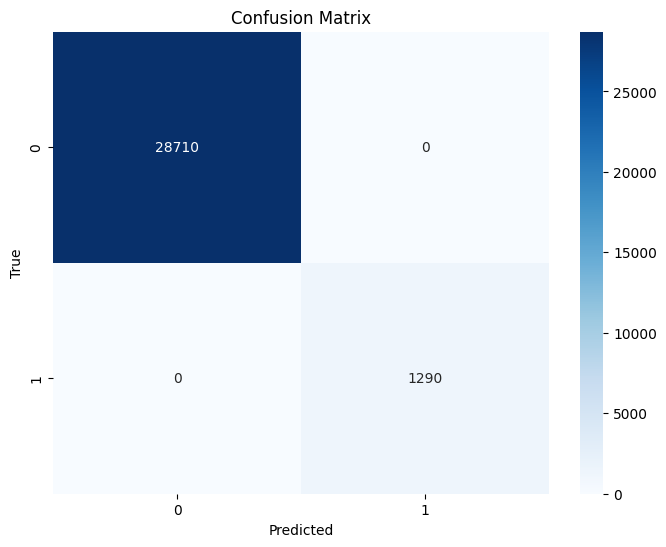

In [24]:
cm = confusion_matrix(y_validation, y_pred.round())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [25]:
accuracy = accuracy_score(y_validation, y_pred.round())
print("Model Training Accuracy:", accuracy)

Model Training Accuracy: 1.0


# testing

In [26]:
y_pred = model.predict(X_testing)

625/625 [==============================] - 1s 2ms/step


In [27]:
accuracy = accuracy_score(y_testing, y_pred.round())
print("Panic Disorder Detection Accuracy:", accuracy)

Panic Disorder Detection Accuracy: 1.0


In [28]:
y_pred.round()

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

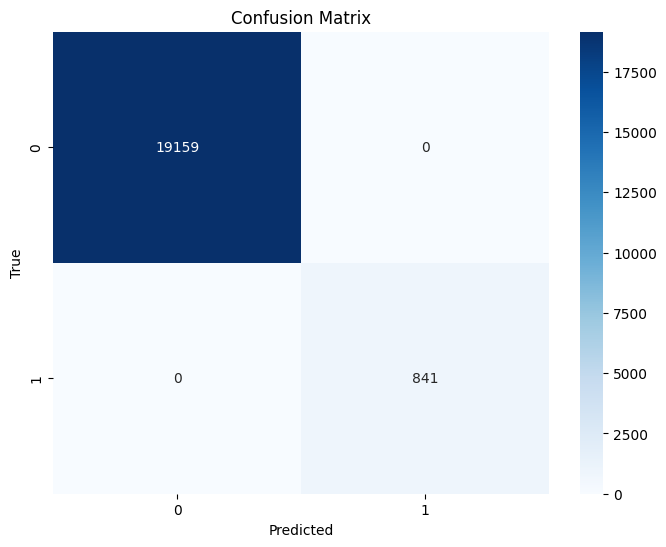

In [29]:
cm = confusion_matrix(y_testing, y_pred.round())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [30]:
from tensorflow.keras.models import save_model
save_model(model, 'cnn_model.h5')

In [31]:
import pickle


In [32]:
pickle.dump(encoder, open('/kaggle/working/encoder.pkl','wb'))


In [33]:
pickle.dump(scaler, open('/kaggle/working/scaler.pkl','wb'))
